# Basics of Stock Data Visualization

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


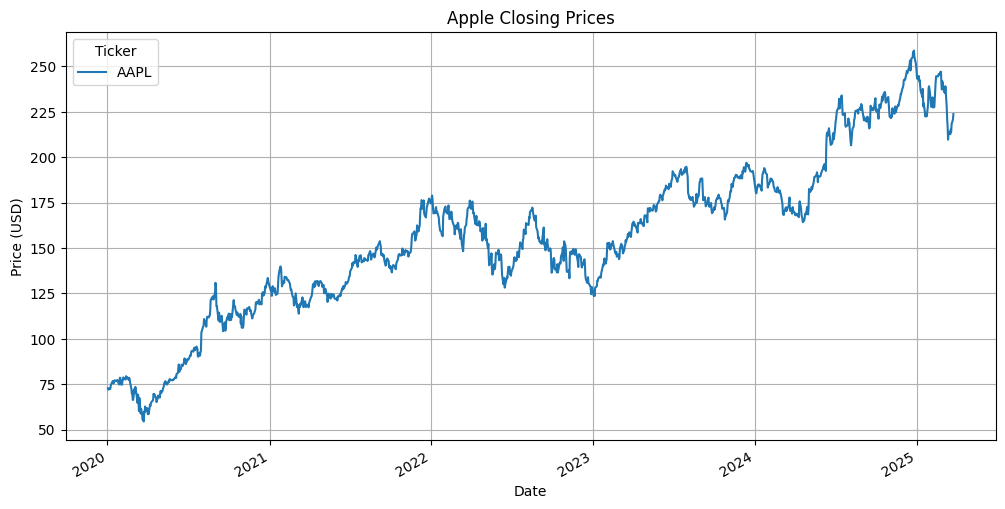

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical stock data for Apple (AAPL)
data = yf.download('AAPL', start='2020-01-01', end='2025-03-26')

# Plot the closing price
data['Close'].plot(title='Apple Closing Prices', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Moving Averages Visualization

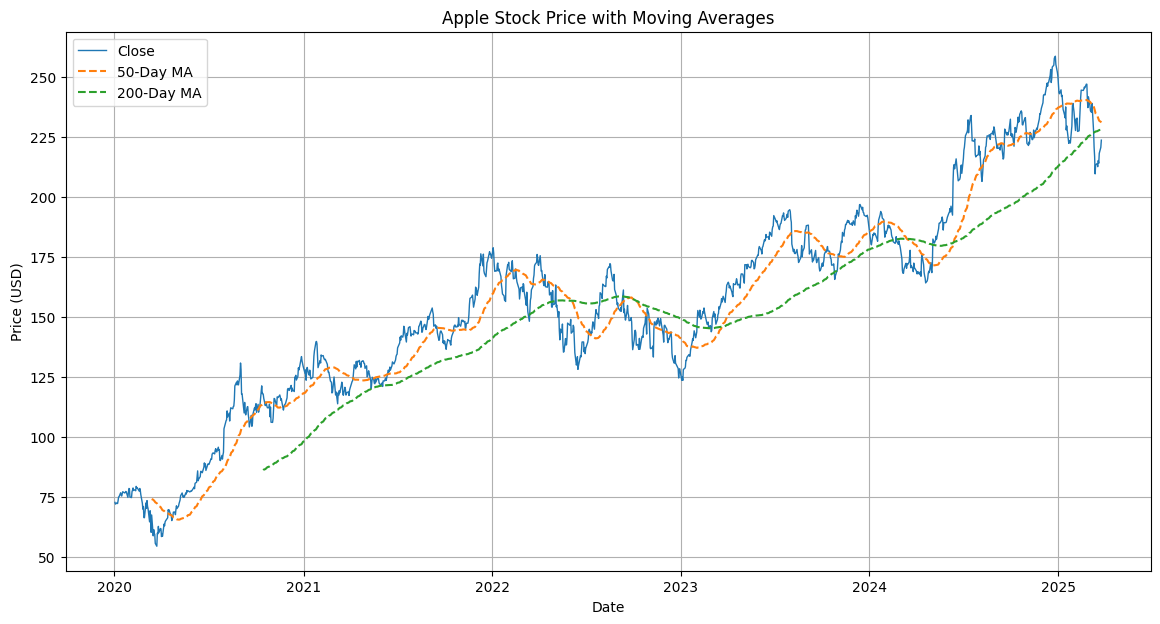

In [6]:
# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plot the closing price with moving averages
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close', linewidth=1)
plt.plot(data['MA50'], label='50-Day MA', linestyle='--')
plt.plot(data['MA200'], label='200-Day MA', linestyle='--')
plt.title('Apple Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Candlestick Charts

[*********************100%***********************]  1 of 1 completed


                 Open       High        Low      Close     Volume
Date                                                             
2020-01-02  71.721011  72.776591  71.466805  72.716064  135480400
2020-01-03  71.941321  72.771737  71.783954  72.009109  146322800
2020-01-06  71.127858  72.621639  70.876068  72.582901  118387200
2020-01-07  72.592601  72.849231  72.021238  72.241554  108872000
2020-01-08  71.943736  73.706256  71.943736  73.403625  132079200


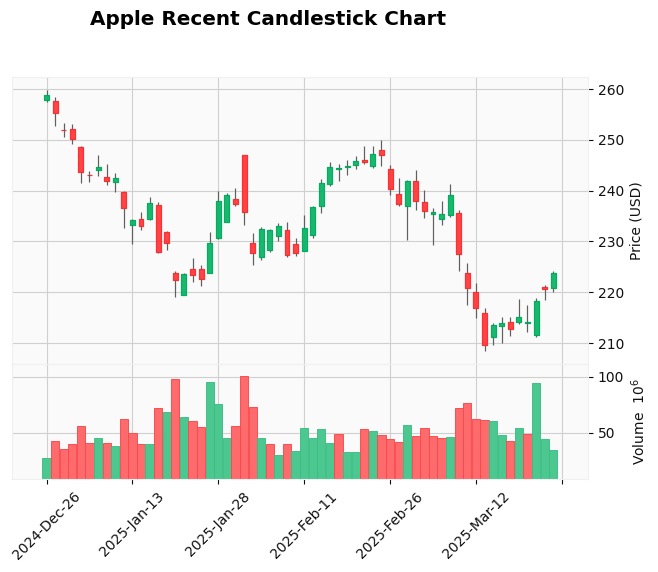

In [22]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# Download historical stock data explicitly
data = yf.download('AAPL', start='2020-01-01', end='2025-03-26')

# Flatten the MultiIndex explicitly
data.columns = ['_'.join(col).strip() for col in data.columns.values]

# Rename columns explicitly to match mplfinance requirements
data.rename(columns={
    'Open_AAPL': 'Open',
    'High_AAPL': 'High',
    'Low_AAPL': 'Low',
    'Close_AAPL': 'Close',
    'Volume_AAPL': 'Volume'
}, inplace=True)

# Keep only necessary columns explicitly
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Ensure all data is numeric and drop NaNs
data = data.apply(pd.to_numeric, errors='coerce').dropna()

# Check final structure (optional for verification)
print(data.head())

# Plot candlestick chart for recent 60 days
mpf.plot(
    data[-60:],
    type='candle',
    volume=True,
    style='yahoo',
    title='Apple Recent Candlestick Chart',
    ylabel='Price (USD)'
)


# Bollinger Bands

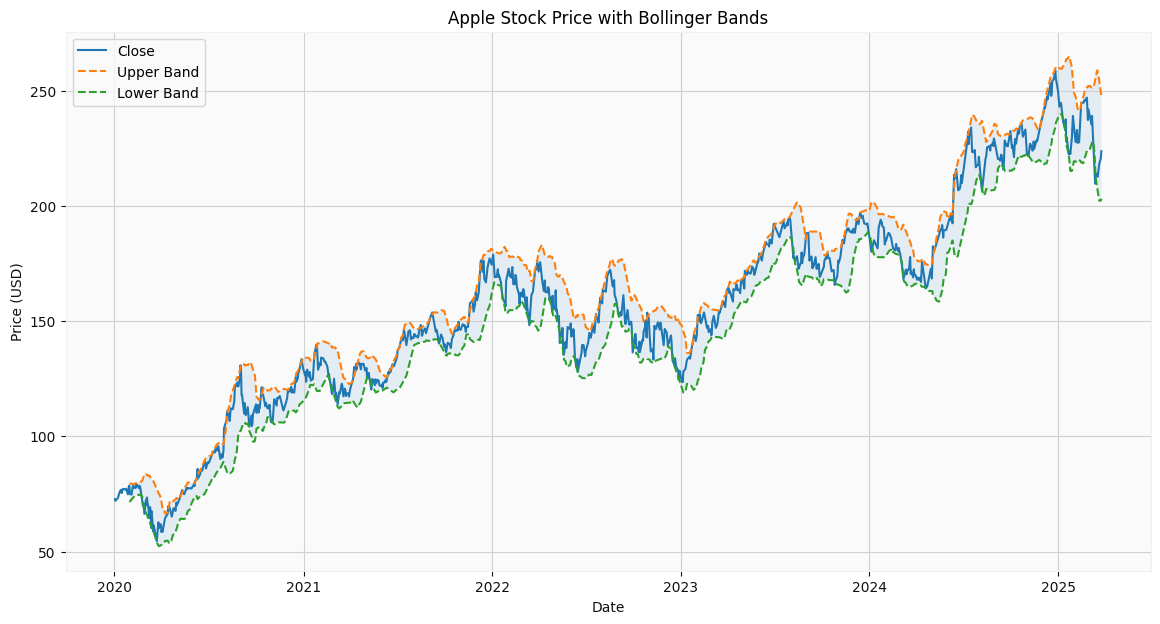

In [24]:
data['20 Day MA'] = data['Close'].rolling(window=20).mean()
data['Upper Band'] = data['20 Day MA'] + (data['Close'].rolling(window=20).std() * 2)
data['Lower Band'] = data['20 Day MA'] - (data['Close'].rolling(window=20).std() * 2)

plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close')
plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')
plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], alpha=0.1)
plt.title('Apple Stock Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Volume Analysis

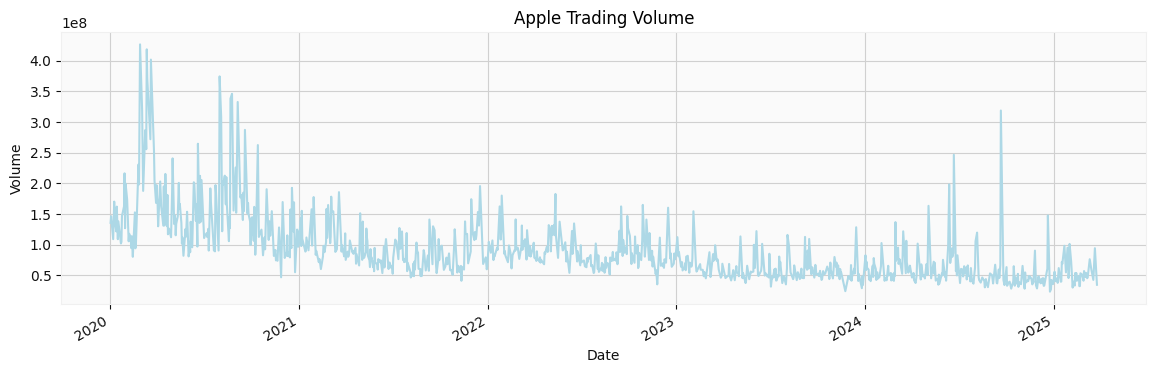

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
data['Volume'].plot(kind='line', color='lightblue', title='Apple Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Relative Strength Index (RSI)

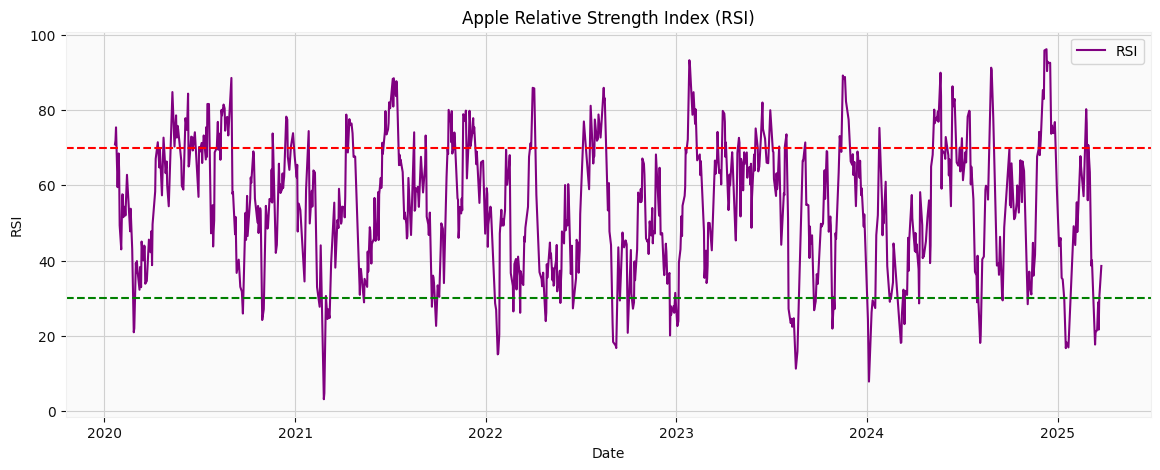

In [39]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0).rolling(window).mean()
    loss = -delta.where(delta < 0, 0).rolling(window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

plt.figure(figsize=(14,5))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Apple Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()